<a href="https://colab.research.google.com/github/sankeawthong/Project-1-Lita-Chatbot/blob/main/Hybrid%20LR-RNN%20for%205%20class%20classifications%20based%20on%20WSN-DS%20dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Hybrid LR-RNN for 5 class classifications based on WSN-DS dataset**

In [54]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import np_utils
from sklearn.metrics import classification_report, confusion_matrix

In [55]:
# Load dataset
dataset = pd.read_csv("dataset_WSN-DS.csv")
dataset.isnull().sum()

 id                 0
 Time               0
 Is_CH              0
 who CH             0
 Dist_To_CH         0
 ADV_S              0
 ADV_R              0
 JOIN_S             0
 JOIN_R             0
 SCH_S              0
 SCH_R              0
Rank                0
 DATA_S             0
 DATA_R             0
 Data_Sent_To_BS    0
 dist_CH_To_BS      0
 send_code          0
Expaned Energy      0
Class               0
dtype: int64

In [58]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374661 entries, 0 to 374660
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0    id               374661 non-null  int64  
 1    Time             374661 non-null  int64  
 2    Is_CH            374661 non-null  int64  
 3    who CH           374661 non-null  int64  
 4    Dist_To_CH       374661 non-null  float64
 5    ADV_S            374661 non-null  int64  
 6    ADV_R            374661 non-null  int64  
 7    JOIN_S           374661 non-null  int64  
 8    JOIN_R           374661 non-null  int64  
 9    SCH_S            374661 non-null  int64  
 10   SCH_R            374661 non-null  int64  
 11  Rank              374661 non-null  int64  
 12   DATA_S           374661 non-null  int64  
 13   DATA_R           374661 non-null  int64  
 14   Data_Sent_To_BS  374661 non-null  int64  
 15   dist_CH_To_BS    374661 non-null  float64
 16   send_code        37

### **Data preprocessing**

In [66]:
encoder = LabelEncoder()
y = encoder.fit_transform(dataset['Class'])
y = np_utils.to_categorical(y, num_classes=5)
X = dataset.drop(['Class'],axis=1)
X=X.values
print(X.shape)
print(y.shape)

(374661, 18)
(374661, 5)


In [67]:
# Data preprocessing
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

### **Hybrid combination of LR and RNN for 5 class classifications**

In [71]:
# Hybrid LR-CNN model
model_lr = LogisticRegression(random_state=0)
model_lr.fit(X_train, np.argmax(y_train, axis=1)) # modify y_train to 1D array

X_train_cnn = X_train.reshape(X_train.shape[0], -1)
X_test_cnn = X_test.reshape(X_test.shape[0], -1)

model_cnn = Sequential()
model_cnn.add(Dense(128, activation='relu', input_shape=(X_train_cnn.shape[1],)))
model_cnn.add(Dense(5, activation='softmax'))
model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_cnn.fit(X_train_cnn, y_train, batch_size=64, epochs=10, verbose=1, validation_data=(X_test_cnn, y_test))

# Combine models
y_pred_lr = model_lr.predict(X_test)
y_pred_lr = np.reshape(y_pred_lr, (y_pred_lr.shape[0], 1)) # add this line
y_pred_cnn = model_cnn.predict(X_test_cnn)
y_pred = (y_pred_lr + y_pred_cnn) / 2
y_pred = np.argmax(y_pred, axis=1)

# Evaluation metrics
print(classification_report(np.argmax(y_test, axis=1), y_pred))
print(confusion_matrix(np.argmax(y_test, axis=1), y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Epoch 1/10
21255/21255 [==============================] - 50s 2ms/step - loss: 498.0658 - accuracy: 0.6322 - val_loss: 82.3301 - val_accuracy: 0.8222
Epoch 2/10
21255/21255 [==============================] - 47s 2ms/step - loss: 112.8967 - accuracy: 0.7596 - val_loss: 31.1898 - val_accuracy: 0.8343
Epoch 3/10
21255/21255 [==============================] - 47s 2ms/step - loss: 14.8650 - accuracy: 0.5917 - val_loss: 1.6090 - val_accuracy: 0.1994
Epoch 4/10
21255/21255 [==============================] - 48s 2ms/step - loss: 1.6420 - accuracy: 0.2004 - val_loss: 1.6093 - val_accuracy: 0.2001
Epoch 5/10
21255/21255 [==============================] - 48s 2ms/step - loss: 1.6095 - accuracy: 0.1999 - val_loss: 1.6094 - val_accuracy: 0.2008
Epoch 6/10
21255/21255 [==============================] - 54s 3ms/step - loss: 1.6095 - accuracy: 0.1996 - val_loss: 1.6095 - val_accuracy: 0.2004
Epoch 7/10
21255/21255 [==============================] - 48s 2ms/step - loss: 1.6095 - accuracy: 0.1997 - val_

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00     67745
           1       0.00      0.00      0.00     68144
           2       0.20      1.00      0.33     68282
           3       0.00      0.00      0.00     68009
           4       0.00      0.00      0.00     67886

    accuracy                           0.20    340066
   macro avg       0.04      0.20      0.07    340066
weighted avg       0.04      0.20      0.07    340066

[[    0     0 67744     1     0]
 [    0     0 68144     0     0]
 [    0     0 68282     0     0]
 [    0     0 68009     0     0]
 [    0     0 67886     0     0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [72]:
report = classification_report(np.argmax(y_test, axis=1), y_pred, output_dict=True)
detection_rates = {}
for cls in range(5):
    detection_rates[encoder.inverse_transform([cls])[0]] = report[str(cls)]['recall']
print("Detection rates:", detection_rates)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Detection rates: {0: 0.0, 1: 0.0, 2: 1.0, 3: 0.0, 4: 0.0}


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
from sklearn import metrics 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
def conf_mat(d1,d2):
  cm = confusion_matrix(d1, d2)
  plt.figure(figsize=(6,5.5))
  ax = sns.heatmap(cm,  fmt='2', annot=True, cmap='YlGnBu')
  sns.set(font_scale=1)
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values\n');
  ax.xaxis.set_ticklabels(['Normal','Blackhole','Flooding','Grayhole','TDMA'])
  ax.yaxis.set_ticklabels(['Normal','Blackhole','Flooding','Grayhole','TDMA'])
  plt.tight_layout()
  # plt.savefig("F1.eps", format = 'eps')
  plt.show()

Confusion Matrix of Hybrid LR-RNN Model


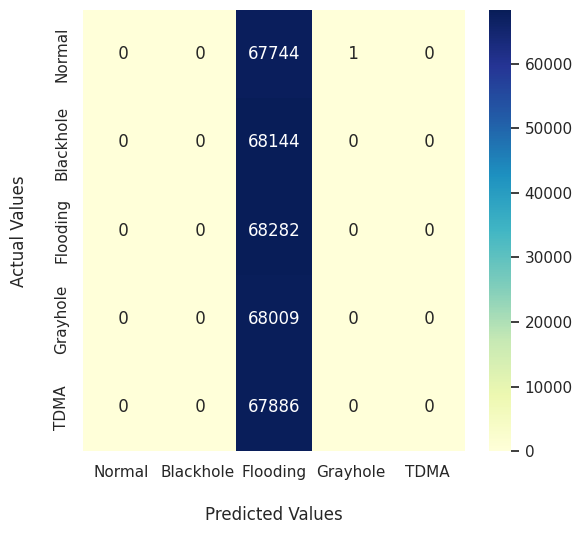

In [74]:
print("Confusion Matrix of Hybrid LR-RNN Model") 
conf_mat(np.argmax(y_test, axis=1), y_pred)